## **Electric Vehicles Market in India:**

- An in-depth examination of the Electric Vehicles
- Particular emphasis on segmentations based on: **Sales Data, Customers Feedback and Technical Specifications**

### **Sales Data:**

- Obtained from the **`Society of Manufacturers of Electric Vehicles`**, spanning 2017-2023.
- It catalogues the sales figures of Electric Vehicles - two-wheelers, three-wheelers, four-wheelers, and buses.
- This dataset provides a comprehensive view of market trends and customers preferences over time. 

In [1]:
# Import necessary libraries
import numpy as np  # Importing numpy for numerical operations
import pandas as pd  # Importing pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for statistical data visualization
import missingno as msno  # Importing missingno for missing data visualization
import nltk  # Importing nltk for natural language processing tasks
from nltk.sentiment import SentimentIntensityAnalyzer  # Importing SentimentIntensityAnalyzer for sentiment analysis
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature scaling
from sklearn.decomposition import PCA  # Importing PCA for dimensionality reduction
from sklearn.cluster import KMeans  # Importing KMeans for clustering
import warnings  # Importing warnings to suppress warnings during execution

# Suppress warnings
warnings.filterwarnings("ignore")

In [2]:
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

In [3]:
data_smev = pd.read_excel("D:\\Project-2.2\\Datasets\\7.smev_data.xlsx", sheet_name=None)
data_smev.keys()

dict_keys(['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23', 'EV Market', 'Electric Bus Sales', 'Electric 4-Wheeler Sales', 'Electric 3-Wheeler Sales', 'Electric 2-Wheeler Sales', 'EV Industries'])

### **Here are the sheets in the Excel data sheet named `smev_data.xlsx`:**

- EV 2W FY 19-20
- EV 2W FY 20-21
- EV 2W FY 21-22
- EV 2W FY 22-23
- EV Market
- Electric Bus Sales
- Electric 4-Wheeler Sales
- Electric 3-Wheeler Sales
- Electric 2-Wheeler Sales
- EV Industries


# **1. Electric Vehicle: Industries:**

In [4]:
data_smev['EV Industries']

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615
5,E-2 Wheelers,2022-23,728090
6,E-3 Wheelers,2017-18,91970
7,E-3 Wheelers,2018-19,116031
8,E-3 Wheelers,2019-20,143051
9,E-3 Wheelers,2020-21,90898


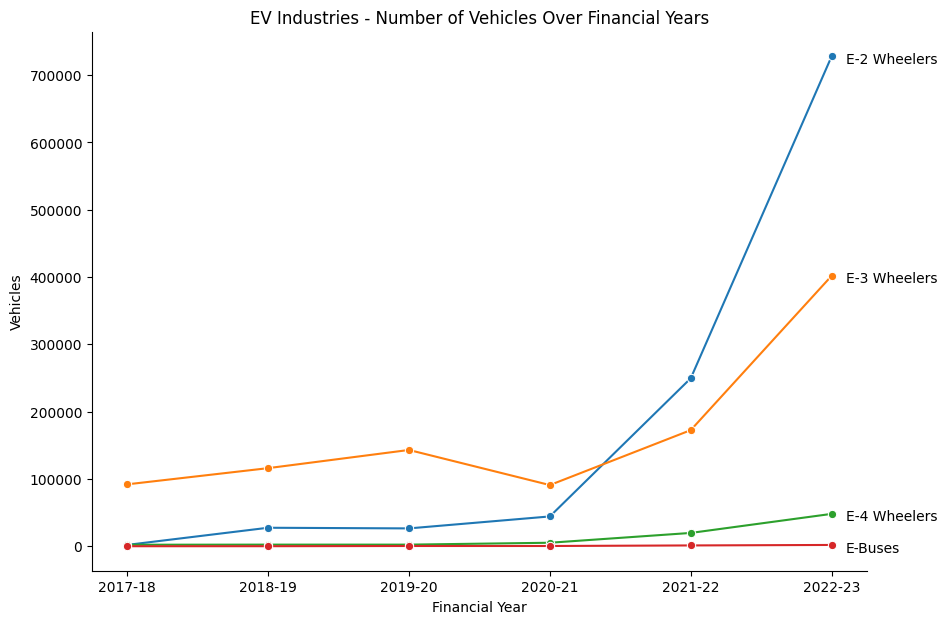

In [5]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.lineplot(data=data_smev['EV Industries'], x='financial_year', y='num_vehicles', hue='category', marker='o', palette='tab10')
plt.xlabel("Financial Year")
plt.ylabel("Vehicles")
plt.legend(title='Category')

# Annotate the last data point
for col in data_smev['EV Industries']['category'].unique():
    last_point = data_smev['EV Industries'][data_smev['EV Industries']['category'] == col].iloc[-1]
    plt.annotate(f"{last_point['category']}", 
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5), 
                 ha='left')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)

# Add title
plt.title('EV Industries - Number of Vehicles Over Financial Years')

# Save the figure
plt.savefig('ev_industries_plot.png')
plt.show()

#### **Observation 1: EV Industries: Number of Vehicles over Financial Years:**

- The depicted figure highlighted the impressive growth trend of India's two-wheeler market in 2023, emphasizing its dominant position within the industry.

# **2. Electric Vehicles: Market:**

In [6]:
data_smev['EV Market']

,Category,Amount INR Cr
0,E-2 Wheelers,2464.27
1,E-3 Wheelers,351.21
2,E-4 Wheelers,114.65
3,E-Buses,687.93


In [7]:
data_smev['EV Market'] = data_smev['EV Market'].sort_values('Amount INR Cr', ascending = False)

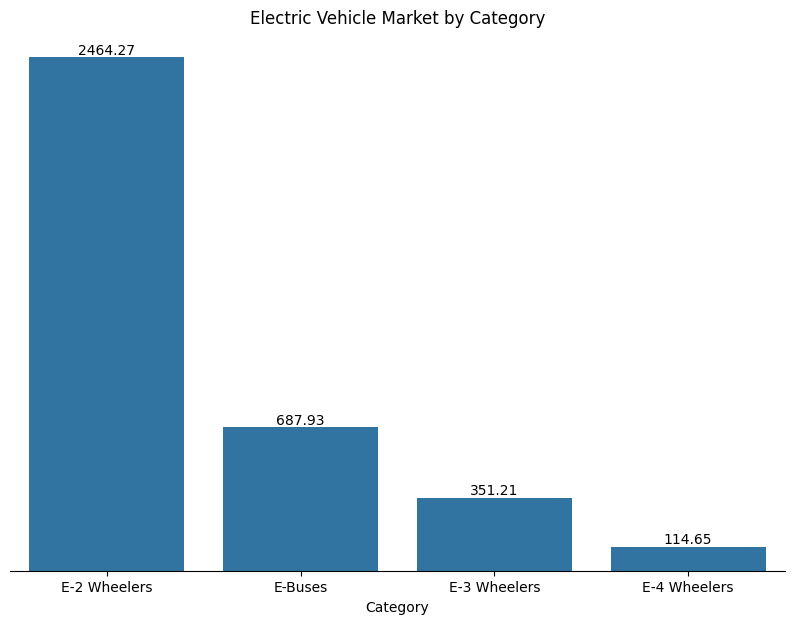

In [8]:
fig, ax = plt.subplots(figsize=(10, 7))

# Assuming data_smev is your DataFrame
ax = sns.barplot(data=data_smev['EV Market'], x='Category', y='Amount INR Cr')

# Add labels to the bars
ax.bar_label(ax.containers[0])

# Remove y-axis ticks and label
plt.yticks([])
plt.ylabel("")

# Remove unnecessary spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# Add a title
plt.title("Electric Vehicle Market by Category")

# Save the figure
plt.savefig("electric_vehicle_market.png", bbox_inches="tight")

# Show the plot
plt.show()

#### **Observation 2: Electric Vehicles Market by Category:**

- The depicted figure provides insights into the financial landscape of the market, showcasing the total industry value in crores.
- Notably, two-wheelers stood out as the predominant contributors to revenue, underscoring their significant economic impact.

In [9]:
ev2w = list(data_smev.keys())[0:4]
data_ev2w = pd.concat([data_smev[ev2w[0]], data_smev[ev2w[1]], data_smev[ev2w[2]], data_smev[ev2w[3]]])

In [10]:
data_ev2w['maker'] = data_ev2w['maker'].str.upper()

In [11]:
np.sort(data_ev2w['maker'].unique())

array(['AMPERE', 'AMPERE VEHICLES', 'ATHER', 'ATHER ENERGY', 'BAJAJ',
       'BEING INDIA', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'JITENDRA NEW EV', 'OKAYA EV', 'OKINAWA', 'OKINAWA AUTOTECH',
       'OLA ELECTRIC', 'OTHERS', 'PURE EV', 'REVOLT', 'TVS'], dtype=object)

In [12]:
data_ev2w['maker'] = data_ev2w['maker'].replace('AMPERE VEHICLES', 'AMPERE').replace('ATHER ENERGY', 'ATHER').replace('BEING INDIA', 'BENLING').replace('JITENDRA NEW EV', 'JITENDRA').replace('OKINAWA AUTOTECH', 'OKINAWA')

In [13]:
np.sort(data_ev2w['maker'].unique())

array(['AMPERE', 'ATHER', 'BAJAJ', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'OKAYA EV', 'OKINAWA', 'OLA ELECTRIC', 'OTHERS', 'PURE EV',
       'REVOLT', 'TVS'], dtype=object)

In [14]:
data_ev2w

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,HERO ELECTRIC,0.30,Apr,1776
1,2019-20,HERO ELECTRIC,0.30,May,455
2,2019-20,HERO ELECTRIC,0.30,Jun,329
3,2019-20,HERO ELECTRIC,0.30,Jul,260
4,2019-20,HERO ELECTRIC,0.30,Aug,249
...,...,...,...,...,...
151,2022-23,OTHERS,0.08,Nov,5241
152,2022-23,OTHERS,0.08,Dec,5233
153,2022-23,OTHERS,0.08,Jan,5111
154,2022-23,OTHERS,0.08,Feb,5083


In [15]:
data_ev2w_year = data_ev2w.groupby(['financial_year', 'maker']).agg({'num_vehicles':'sum'}).reset_index()

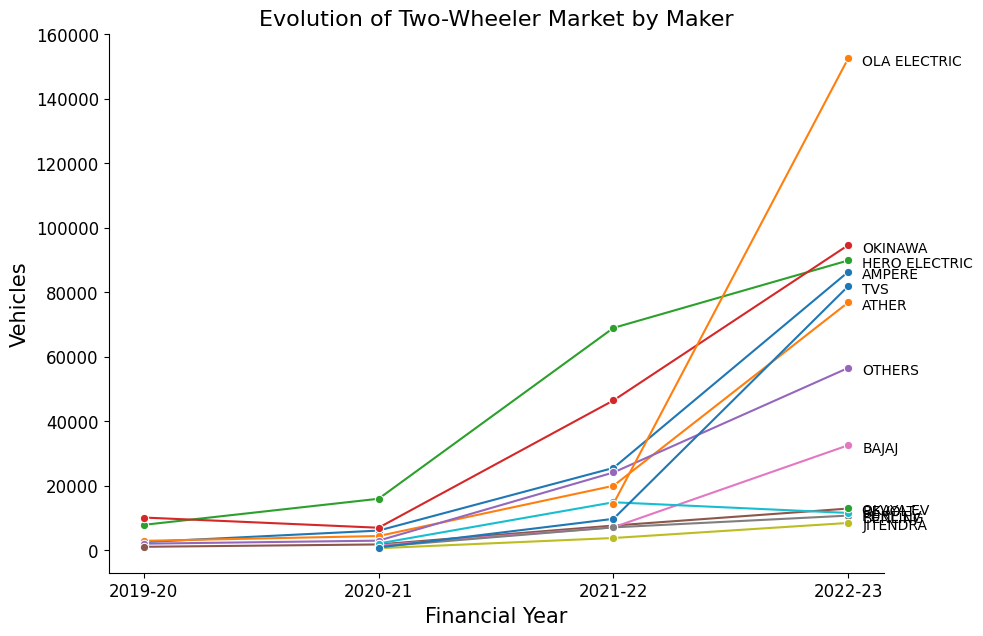

In [16]:
fig, ax = plt.subplots(figsize=(10, 7))

# Assuming data_ev2w_year is your DataFrame
ax = sns.lineplot(data=data_ev2w_year, x='financial_year', y='num_vehicles', hue='maker', marker='o', palette='tab10')

# Add labels for x and y axes
plt.xlabel("Financial Year", fontsize=15)
plt.ylabel("Vehicles", fontsize=15)

# Set font sizes for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(title='Maker')

# Annotate the last data point for each maker
for col in data_ev2w_year['maker'].unique():
    last_point = data_ev2w_year[data_ev2w_year['maker'] == col].iloc[-1]
    plt.annotate(f"{last_point['maker']}", 
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5), 
                 ha='left')

# Remove right and top spines
ax.spines[['right', 'top']].set_visible(False)

# Hide the legend
ax.get_legend().set_visible(False)

# Add title
plt.title("Evolution of Two-Wheeler Market by Maker", fontsize=16)

# Save the figure
plt.savefig("evolution_two_wheeler_market.png", bbox_inches="tight")

# Show the plot
plt.show()

### **Observation 3:**

- The presented figure focuses on particular electric two-wheeler companies, showcasing Ola Electric as the market leader in 2023.
- This illustrates the company's leadership within the industry and its competitive position in the market.





# **Electric Vehicle: Market Segmentation:**

The dataset utilized for conducting market segmentation analysis, sourced from www.bikewale.com, consists of customer reviews for electric two-wheelers. These reviews provide essential insights into customer behavior and psychographics. Additionally, the dataset includes comprehensive technical specifications and pricing details of electric two-wheelers. This information enabled us to evaluate the technical feasibility and determine critical price points for our market segmentation strategy.




In [17]:
# Read the CSV file containing electric two-wheeler customer reviews from bikewale.com
# Assuming the file path is "D:\\Project-2.2\\Datasets\\6.ev2_bikewale.csv"
data_bw = pd.read_csv("D:\\Project-2.2\\Datasets\\6.ev2_bikewale.csv")

# Read the CSV file containing detailed technical specifications of electric two-wheelers
# Assuming the file path is "D:\\Project-2.2\\Datasets\\5.ev_model_spec.csv"
data_model = pd.read_csv("D:\\Project-2.2\\Datasets\\5.ev_model_spec.csv")

In [18]:
# Merge the two DataFrames on the 'Model Name' column using a left join
data = data_bw.merge(data_model, how='left', on='Model Name')

In [19]:
# Display the first few rows of the merged DataFrame
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000


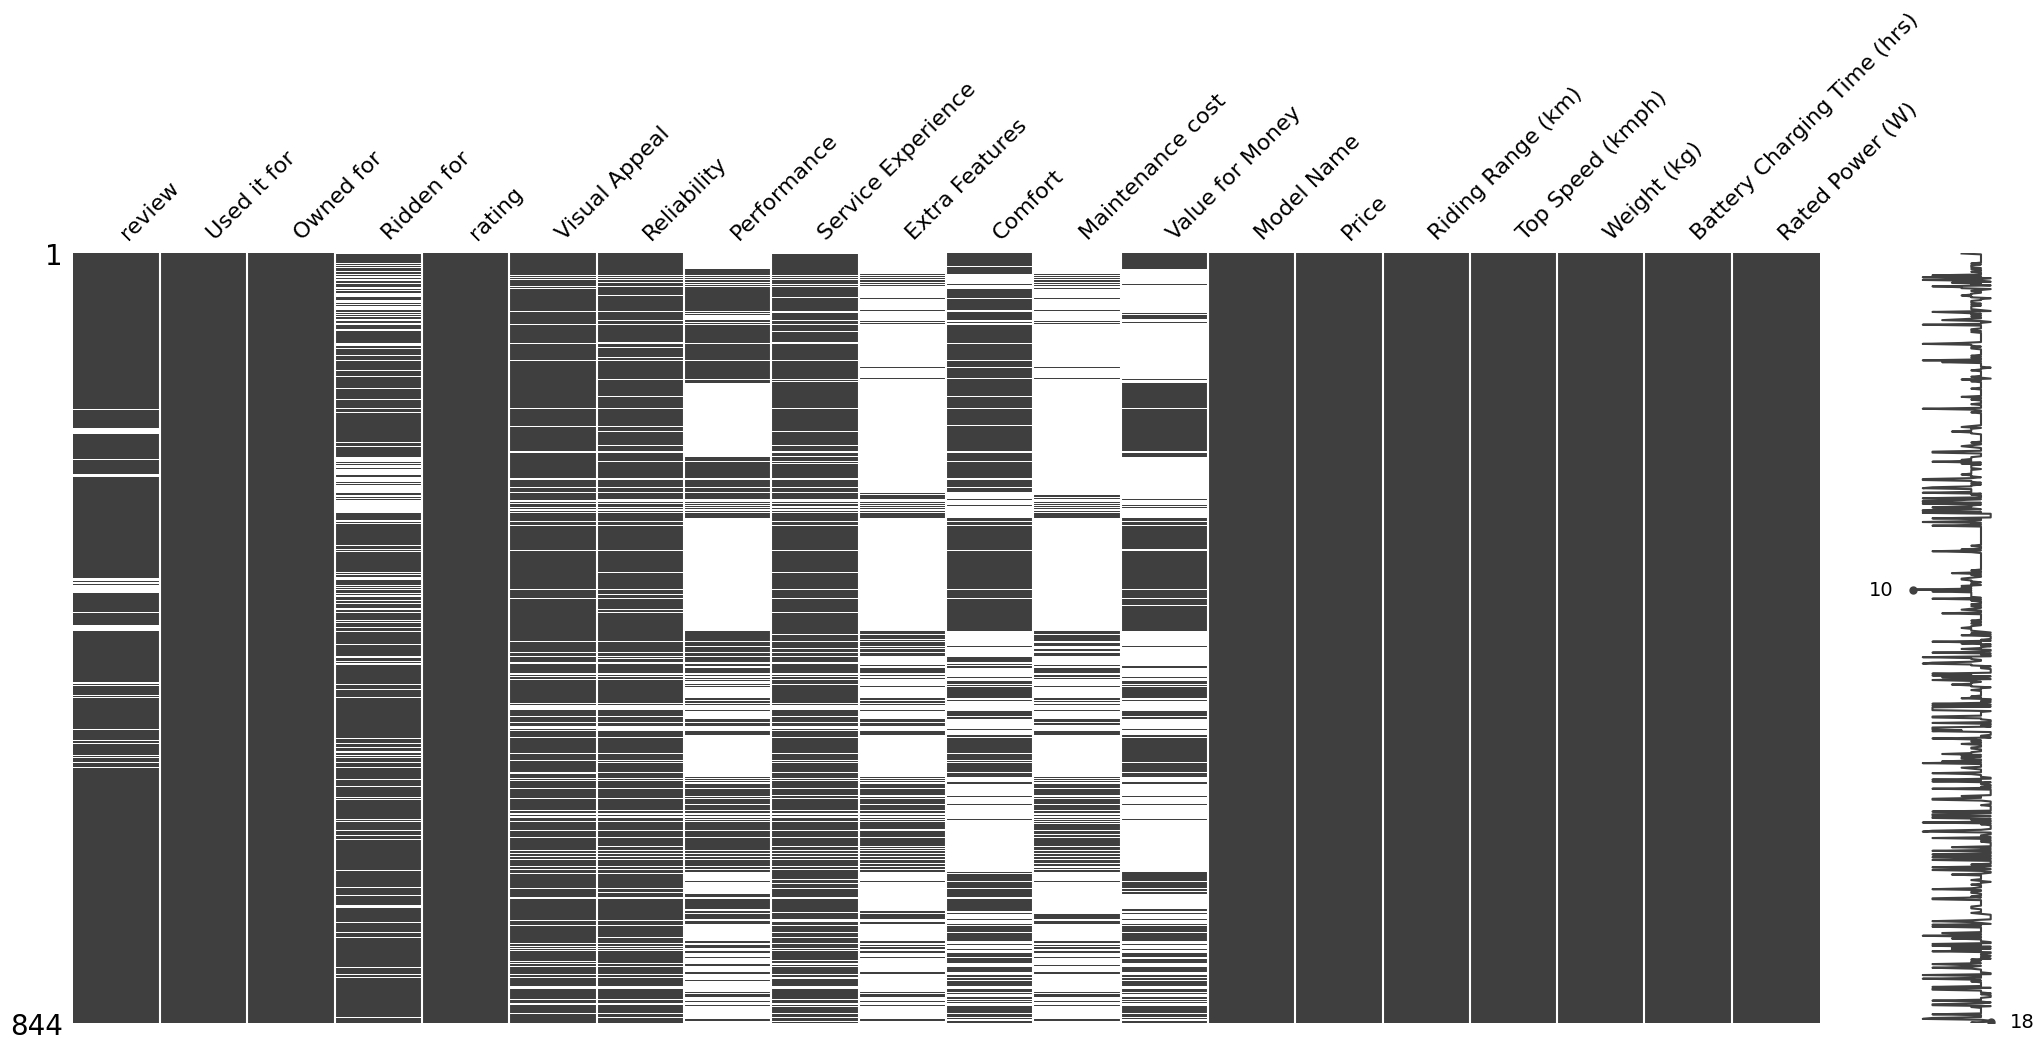

In [22]:
import missingno as msno

# Create a missing value matrix to visualize missing values in the DataFrame
msno.matrix(data)

# Save the figure
plt.savefig("missing_value_matrix.png", bbox_inches="tight")

In [23]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() * 100 / data.shape[0])

# Sort the percentages in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Display the result
display(missing_percentage_sorted)

Maintenance cost               78.672986
Extra Features                 78.080569
Performance                    59.123223
Value for Money                53.791469
Comfort                        37.203791
Ridden for                     20.853081
Service Experience             16.706161
Reliability                    15.165877
Visual Appeal                  12.440758
review                          5.568720
Used it for                     0.000000
rating                          0.000000
Owned for                       0.000000
Model Name                      0.000000
Price                           0.000000
Riding Range (km)               0.000000
Top Speed (kmph)                0.000000
Weight (kg)                     0.000000
Battery Charging Time (hrs)     0.000000
Rated Power (W)                 0.000000
dtype: float64

In [24]:
# Display concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review                       797 non-null    object 
 1   Used it for                  844 non-null    object 
 2   Owned for                    844 non-null    object 
 3   Ridden for                   668 non-null    object 
 4   rating                       844 non-null    int64  
 5   Visual Appeal                739 non-null    float64
 6   Reliability                  716 non-null    float64
 7   Performance                  345 non-null    float64
 8   Service Experience           703 non-null    float64
 9   Extra Features               185 non-null    float64
 10  Comfort                      530 non-null    float64
 11  Maintenance cost             180 non-null    float64
 12  Value for Money              390 non-null    float64
 13  Model Name          

In [25]:
# Initialize the SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Initialize an empty list to store sentiment labels
sentiments_list = []

# Loop through each review in the 'review' column of the DataFrame
for review_text in data['review']:
    # Check if the review_text is NaN (missing value)
    if pd.isna(review_text):
        # If review_text is missing, label it as 'neutral' and continue to the next iteration
        sentiments_list.append('neutral')
        continue
    
    # Calculate sentiment scores using SentimentIntensityAnalyzer
    sentiment_scores = sentiments.polarity_scores(review_text)
    
    # Extract positive and negative scores from sentiment_scores
    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']
    
    # Determine the sentiment label based on the scores
    if positive_score > negative_score:
        sentiment_label = 'positive'
    elif positive_score < negative_score:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'
    
    # Append the sentiment label to the sentiments_list
    sentiments_list.append(sentiment_label)

# Add a new column 'sentiment' to the DataFrame with sentiment labels
data['sentiment'] = sentiments_list

In [26]:
# Count the occurrences of each sentiment label in the 'sentiment' column
sentiment_counts = data['sentiment'].value_counts()

# Display the counts of each sentiment label
display(sentiment_counts)

sentiment
positive    527
negative    264
neutral      53
Name: count, dtype: int64

In [27]:
# Select specific columns of interest from the original DataFrame 'data' and create a new DataFrame 'data_segment'
data_segment = data[['Used it for', 'Owned for', 'Ridden for', 'rating',
                    'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
                    'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
                    'sentiment']].copy()

In [28]:
# Display the first few rows of the DataFrame 'data_segment'
data_segment.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,negative
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,negative
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,positive
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,negative
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,negative


In [29]:
# Select columns from index 5 to 12 (inclusive) from the original DataFrame 'data' and create a new DataFrame 'data_segment'
data_segment = data.iloc[:, 5:13].copy()

In [30]:
# Fill missing values with 0 in the DataFrame 'data_segment'
data_segment = data_segment.fillna(0.)

In [31]:
# Display concise summary of the DataFrame 'data_segment'
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 52.9 KB


In [32]:
# Calculate the mean value for each column in the DataFrame 'data_segment'
mean_values = data_segment.mean()

# Display the mean values for each column
display(mean_values)

Visual Appeal         3.309242
Reliability           2.811611
Performance           1.441943
Service Experience    2.619668
Extra Features        0.643365
Comfort               2.300948
Maintenance cost      0.723934
Value for Money       1.562796
dtype: float64

In [33]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features in the DataFrame 'data_segment'
data_scaled = scaler.fit_transform(data_segment)

In [34]:
from sklearn.decomposition import PCA

# Initialize the PCA object with a random state for reproducibility
pca = PCA(random_state=42)

# Fit the PCA model to the scaled data
pca.fit(data_scaled)

PCA(random_state=42)

In [35]:
# Transform the scaled data using the fitted PCA model
data_pca = pca.transform(data_scaled)

In [36]:
# Create a DataFrame from the transformed PCA data with column names PC1, PC2, ..., PCn
df_pca = pd.DataFrame(data_pca, columns=[f'PC{x+1}' for x in range(data_pca.shape[1])])

In [37]:
# Display the first few rows of the DataFrame 'df_pca'
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.291227,-1.038055,0.354864,-0.623469,-1.102720,-0.169287,-0.438012,0.957827
1,0.710801,-1.394405,-0.360466,-0.621671,0.320899,-0.086053,-0.426279,-0.149917
2,-0.849149,-1.189765,0.167683,-0.410898,-0.409054,-0.191904,-0.329993,0.830738
3,1.967022,-0.878935,-0.100197,0.330003,-0.075822,0.069599,0.013068,0.011328
4,0.078940,-1.017161,-0.079210,-0.324132,-0.961554,0.005517,-0.107260,0.427972


In [38]:
# Create a DataFrame 'pca_summary' with information about the principal components
pca_summary = pd.DataFrame({
    'Standard Deviation': df_pca.std(),  # Calculate the standard deviation of each principal component
    'Proportion of Variance': pca.explained_variance_ratio_,  # Get the proportion of variance explained by each principal component
    'Cumulative Proportion': pca.explained_variance_ratio_.cumsum()  # Calculate the cumulative proportion of variance explained
})

In [40]:
# Display the DataFrame 'pca_summary'
display(pca_summary)

,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,1.845017,0.425007,0.425007
PC2,1.736646,0.376546,0.801553
PC3,0.903486,0.101915,0.903468
PC4,0.517750,0.033468,0.936936
PC5,0.405239,0.020503,0.957439
PC6,0.379558,0.017987,0.975426
PC7,0.337883,0.014254,0.989680
PC8,0.287510,0.010320,1.000000


In [44]:
# Create a DataFrame 'factor_loadings' with factor loadings from the PCA analysis
factor_loadings = pd.DataFrame(pca.components_, columns=data_segment.columns, index=df_pca.columns).T

In [49]:
factor_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,-0.480170,0.117814,0.063320,-0.730598,0.247014,0.105903,0.375474,0.067539
Reliability,-0.494758,0.124910,-0.002776,0.152447,-0.819319,0.060484,0.117211,0.166384
Performance,-0.128721,0.459145,0.574833,-0.005549,-0.019902,-0.025704,-0.288468,-0.598232
Service Experience,-0.486499,0.100691,-0.054176,0.653781,0.470391,0.052432,0.311210,-0.044129
Extra Features,-0.024373,0.519633,-0.364578,-0.023208,0.116821,0.559390,-0.456829,0.246323
Comfort,-0.418255,-0.304266,0.249807,-0.020111,0.172621,-0.296656,-0.623271,0.404238
Maintenance cost,0.005912,0.513208,-0.386495,-0.054822,0.020302,-0.762039,-0.003360,0.055435
Value for Money,-0.309572,-0.351548,-0.563840,-0.107598,-0.046688,0.009572,-0.260855,-0.617065


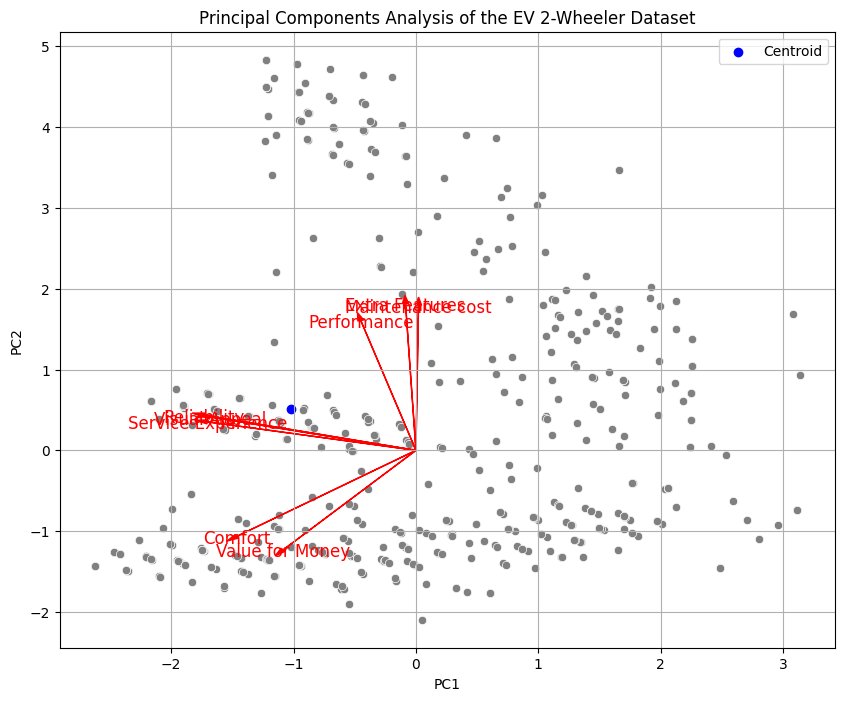

In [53]:
# Calculate centroid
centroid_x = factor_loadings['PC1'].mean() * 3.5  # Scale the mean PC1 value for visualization
centroid_y = factor_loadings['PC2'].mean() * 3.5  # Scale the mean PC2 value for visualization

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot data points
sns.scatterplot(data=df_pca, x='PC1', y='PC2', color='grey')

# Plot arrows from centroid to provided coordinates with index names
for i, (index, row) in enumerate(factor_loadings.iterrows()):
    plt.arrow(0, 0, row['PC1'] * 3.5, row['PC2'] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(row['PC1'] * 3.5, row['PC2'] * 3.5, index, fontsize=12, ha='center', color='red', va='center_baseline')

# Plot centroid
plt.scatter(centroid_x, centroid_y, color='blue', label='Centroid')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Components Analysis of the EV 2-Wheeler Dataset')
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig('pca_plot.png')

# Show the plot
plt.show()

In [54]:
from sklearn.cluster import KMeans

# List comprehension to fit KMeans models for different numbers of clusters (k) ranging from 2 to 8
data_km28 = [KMeans(n_clusters=k, random_state=42).fit(data_scaled) for k in range(2, 9)]

# Explanation:
# - `range(2, 9)` generates integers from 2 to 8 (inclusive) to represent the number of clusters (k).
# - For each value of k, a KMeans model is created and fitted to the scaled data using `KMeans()` with the specified number of clusters and random state.
# - The fitted KMeans models are stored in a list named `data_km28`.

In [55]:
# List comprehension to calculate the within-cluster sum of squares (WCSS) for each KMeans model in data_km28
wcss = [model.inertia_ for model in data_km28]

# Explanation:
# - `model.inertia_` returns the within-cluster sum of squares (WCSS) for each fitted KMeans model.
# - List comprehension iterates over each model in data_km28 and calculates its WCSS using `model.inertia_`.
# - The resulting WCSS values are stored in the list named `wcss`.

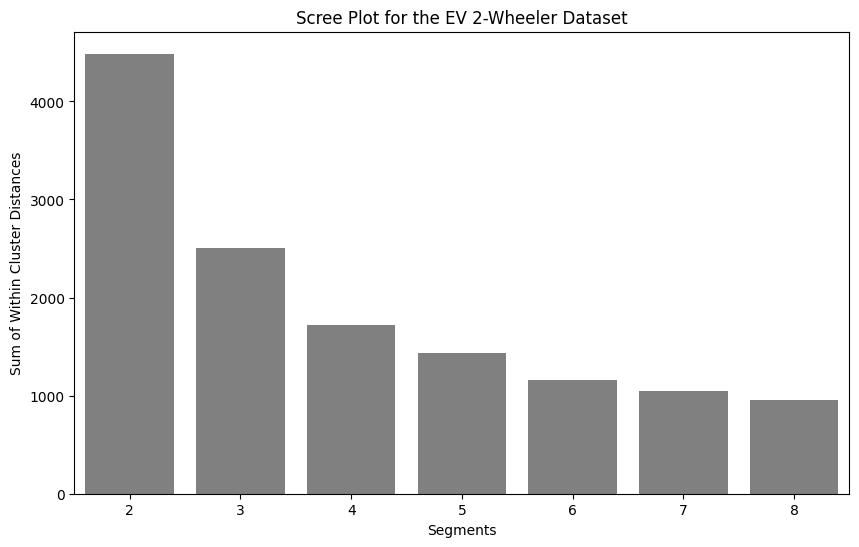

In [56]:
# Increase the size of the figure
fig = plt.figure(figsize=(10, 6))  # Set the figure size to 10 inches in width and 6 inches in height

# Create the bar plot
sns.barplot(x=list(range(2, 9)), y=wcss, color='grey')  # Plotting the bar plot

# Set labels and title
plt.xlabel("Segments")  # Setting the label for the x-axis
plt.ylabel('Sum of Within Cluster Distances')  # Setting the label for the y-axis
plt.title("Scree Plot for the EV 2-Wheeler Dataset")  # Setting the title of the plot

# Save the figure
plt.savefig('scree_plot.png')  # Save the figure with the specified name

# Show the plot
plt.show()  # Displaying the plot

In [58]:
# Calculate the differences in WCSS values between consecutive segments
wcss_diff = pd.DataFrame({
    'Segments': range(2, 9),  # Creating a column for the number of segments (clusters)
    'WCSS Difference': pd.Series(wcss).diff()  # Calculating the difference in WCSS values between consecutive segments
})

# Explanation:
# - `range(2, 9)` generates integers from 2 to 8 (inclusive) to represent the number of segments (clusters).
# - `pd.Series(wcss).diff()` calculates the differences between consecutive elements of the WCSS values (wcss).
# - The resulting differences are stored in a new column named 'WCSS Difference' in the DataFrame `wcss_diff`.

# Replace the first NaN value (resulting from the difference operation) with 0
wcss_diff['WCSS Difference'][0] = 0  # Replacing the first NaN value with 0

# Explanation:
# - The first row of the 'WCSS Difference' column will have a NaN value since there is no previous WCSS value to calculate the difference from.
# - This NaN value is replaced with 0 to indicate that there is no change in WCSS for the first segment (k=2).

# Display the DataFrame
display(wcss_diff)

,Segments,WCSS Difference
0,2,0.000000
1,3,-1980.336894
2,4,-786.596810
3,5,-281.442021
4,6,-281.988884
5,7,-103.611334
6,8,-97.864719


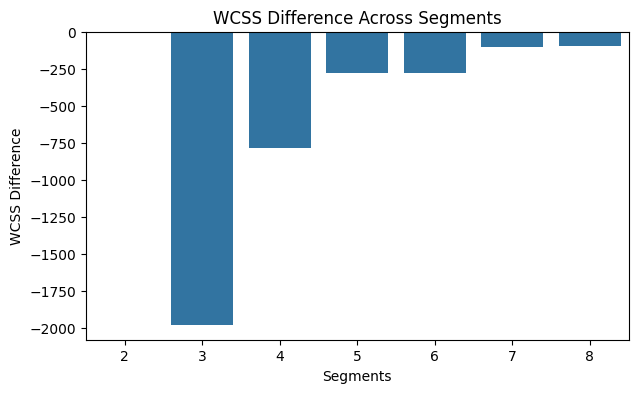

In [59]:
# Create a figure with a specific size
plt.figure(figsize=(7, 4))

# Create a bar plot using seaborn
sns.barplot(data=wcss_diff, x='Segments', y='WCSS Difference')

# Set labels and title
plt.xlabel('Segments')  # Label for the x-axis
plt.ylabel('WCSS Difference')  # Label for the y-axis
plt.title('WCSS Difference Across Segments')  # Title of the plot

# Show the plot
plt.show()

### **Observation:**

The scree plot above played a crucial role in our decision-making process, highlighting a clear elbow at four segments. This distinct point signifies a significant reduction in distances, indicating the optimal number of segments for our analysis.s.

In [60]:
# Selecting the KMeans model with 4 clusters (index 2) from the list of fitted KMeans models
kmeans = data_km28[2]

# Creating a DataFrame for clustered data using the scaled data and original column names
data_clust = pd.DataFrame(data_scaled, columns=data_segment.columns)

# Assigning cluster labels to the data
data_clust['cluster'] = kmeans.labels_

# Creating a copy of the DataFrame containing PCA-transformed data
data_pca = df_pca.copy()

# Assigning cluster labels to the PCA-transformed data
data_pca['cluster'] = kmeans.labels_

## **Profiling Segments:**

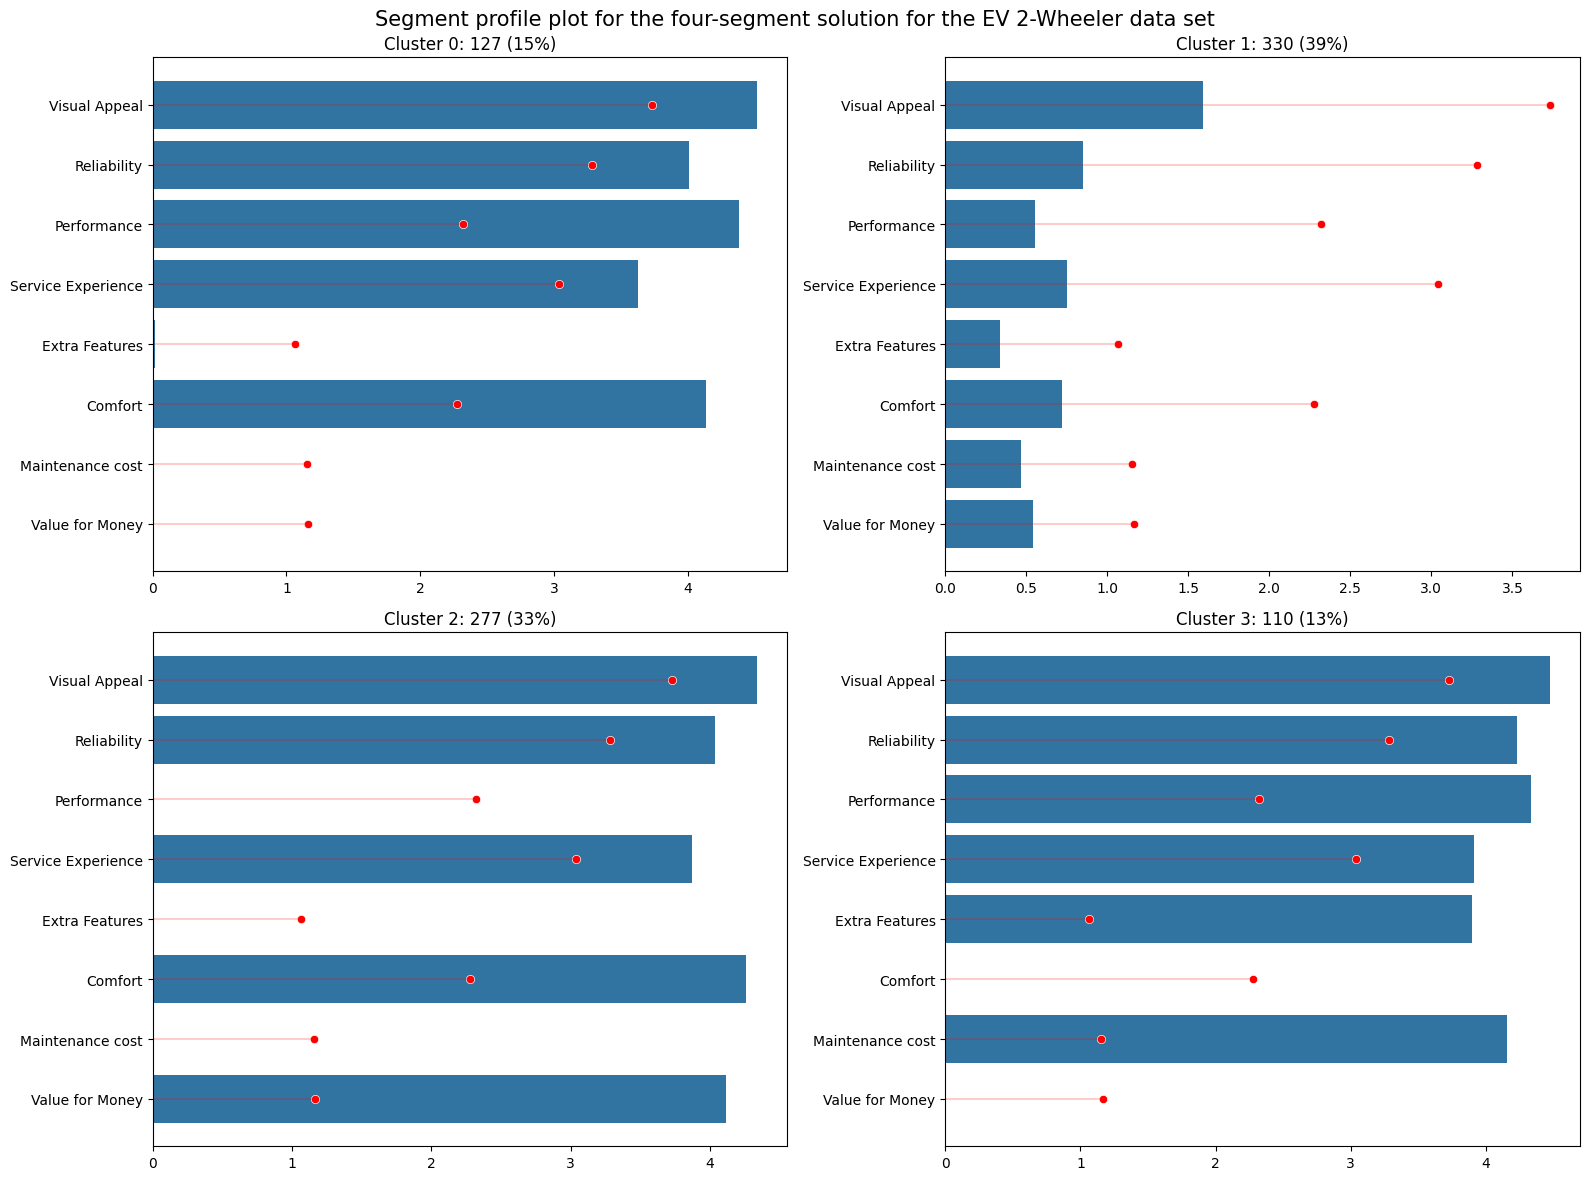

In [61]:
# Copy the data segment for manipulation
data_profile = data_segment.copy()

# Assign cluster labels to the data
data_profile['cluster'] = kmeans.labels_

# Get columns from data_clust
columns_segment = data_clust.columns

# Calculate mean for each variable by cluster and transpose the result
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T

# Calculate the mean across clusters for each variable
data_pivot_mean = data_pivot.mean(axis=1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

# Set the figure size
plt.figure(figsize=(16, 12))

# Loop through each cluster
for i in range(4):
    # Create subplots
    plt.subplot(2, 2, i+1)
    
    # Plot barplot for each cluster
    sns.barplot(data_pivot, x=i, y=data_pivot.index)
    
    # Plot scatterplot for mean values
    sns.scatterplot(data_pivot_mean, x='Value', y='Variable', color='red')
    
    # Plot horizontal lines for mean values
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha=0.2)
    
    # Set labels and title
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i]*100/len(data_profile):.0f}%)")

# Set the title for the entire plot
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize=15)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("segment_profile_plot.png")

# Display the plot
plt.show()

#### **The graph above visually represents the varying perceptions among different consumer segments:**

- **Segment 0:** This group constitutes 15% of consumers and shows a strong appreciation for various aspects of electric two-wheeler vehicles. They highly value the visual appeal, reliability, performance, service experience, and comfort offered by these vehicles.

- **Segment 1:** Representing the largest segment at 39% of consumers, this group expresses dissatisfaction across all measured aspects. Despite their significant numbers, they are the least satisfied with the electric two-wheeler experience.

- **Segment 2:** Comprising 33% of consumers, this segment appreciates several key attributes of electric two-wheelers. They value visual appeal, reliability, service experience, and comfort, and notably prioritize the aspect of value for money, indicating a balanced perspective on cost-effectiveness.

- **Segment 3:** The smallest segment at 13% of consumers, this group showcases distinct preferences and perceptions. They highly value visual appeal, reliability, performance, service experience, extra features, and maintenance cost. This segment's emphasis on various features and costs highlights their specific priorities and expectations from electric two-wheeler vehicles.

Overall, the segmentation analysis reveals diverse consumer preferences and priorities within the electric two-wheeler market, ranging from a strong emphasis on performance and comfort to a focus on value for money and specific feature sets.


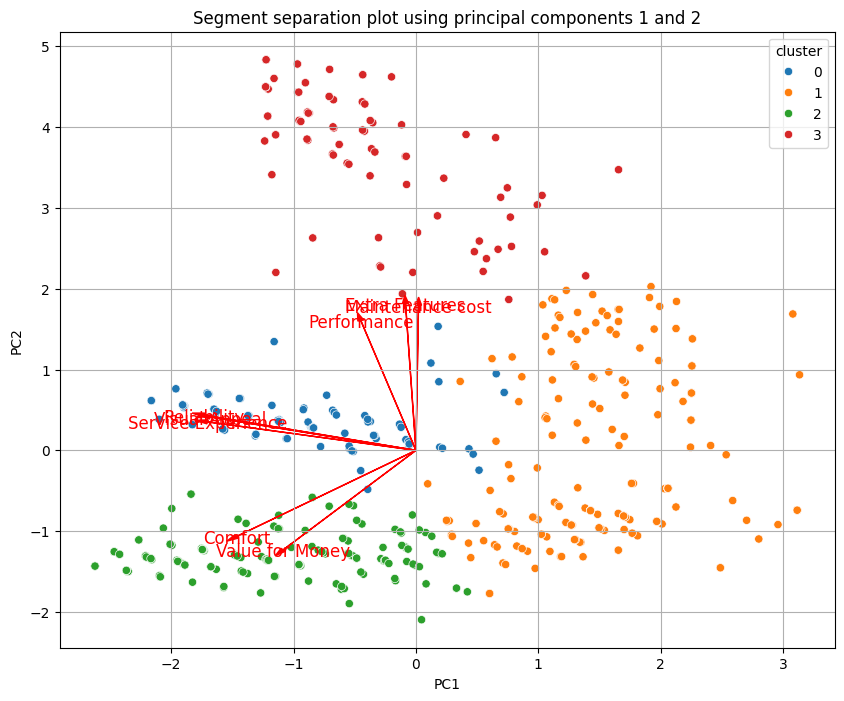

In [62]:
# Calculate centroid
index_names = factor_loadings.index

# Set figure size
plt.figure(figsize=(10, 8))

# Plot data points
sns.scatterplot(data_pca, x='PC1', y='PC2', hue='cluster', palette='tab10')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, index_names[i], fontsize=12, ha='center', color='red', va='center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)

# Save the figure
plt.savefig("segment_separation_plot.png")

# Show the plot
plt.show()

### **Observation:** 
- The Figure above, utilizing principal components, highlights the distinctions among segments more prominently.
- Particularly noteworthy is Segment 1, which, despite its size, stands out for its lack of distinct preferences, rendering them unique in their overall lack of satisfaction.

## **Describing Segments:**

In [63]:
# Copy the original data for manipulation
data_desc = data.copy()

# Assign cluster labels to the data using k-means clustering
data_desc['cluster'] = kmeans.labels_

# Display the columns of the updated dataframe
data_desc.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)',
       'sentiment', 'cluster'],
      dtype='object')

In [64]:
def mosaicplot(df, color_list, figsize=(5,5), barwidth=1, title="Simple Mosaic Plot", xlabel='cat'):
    """
    Function to create a mosaic plot from a DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data to be plotted.
        color_list (list): List of colors to use for each category.
        figsize (tuple): Size of the figure (width, height).
        barwidth (float): Width of the bars in the plot.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.

    Returns:
        None
    """

    # Create a new figure and axis with specified size
    fig, ax = plt.subplots(figsize=figsize)

    # Convert counts to ratio of each row sum and do a cumulative sum along rows
    p_cnt_ratio_df = df.div(df.sum(1), axis=0)
    ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)

    # Get column order
    col_order = ratio_cum_df.columns.tolist()

    # Get row labels
    x = [str(n) for n in ratio_cum_df.index.tolist()]

    # Plot each category with specified color
    for col, colour in zip(col_order[::-1], color_list):
        plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)

    # Add legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

    # Set title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)

    # Configure axis spines and ticks
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.yticks([])  # Hide y-axis ticks

    # Show the plot
    plt.show()

In [65]:
# Define a list of colors for each category
color_list = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F']

# Create a contingency table (cross-tabulation) of sentiment by cluster
sentiment_cluster = pd.crosstab(index=data_desc['cluster'], columns=data_desc['sentiment'])

# Display the contingency table
sentiment_cluster

sentiment,negative,neutral,positive
cluster,,,
0,13,4,110
1,204,8,118
2,30,41,206
3,17,0,93


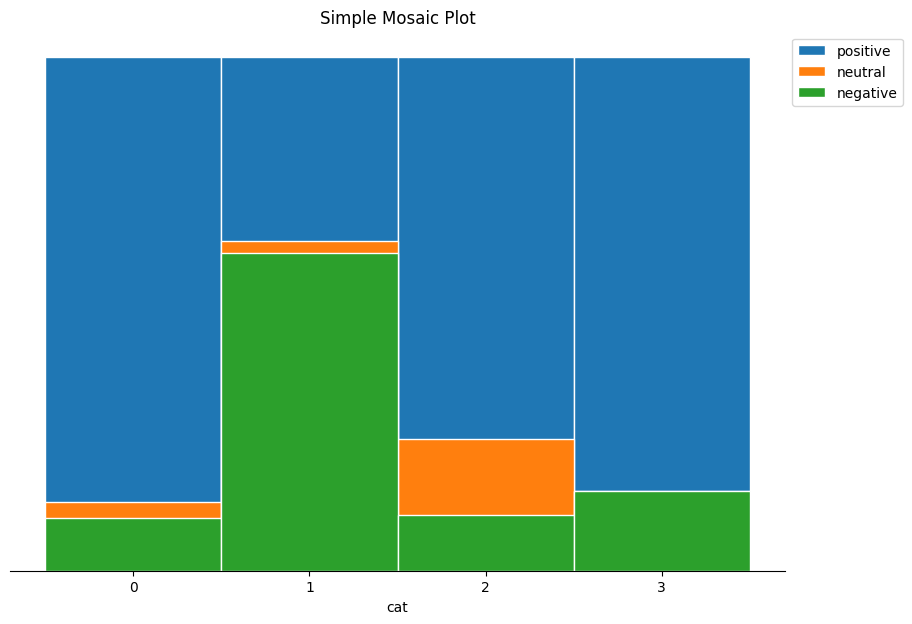

<Figure size 640x480 with 0 Axes>

In [73]:
# Call the mosaicplot function to create a mosaic plot
mosaicplot(sentiment_cluster, color_list[:3], figsize=(10, 7), barwidth=1)

# Save the figure
plt.savefig("sentiment_mosaic_plot.png")

# Show the plot
plt.show()

### **Observation:**

The mosaic plot above delves into consumer sentiments, uncovering that all segments, except for Segment 1, display positive sentiments. Notably, consumers in Segment 1 stand out with negative sentiments, signaling widespread dissatisfaction across various aspects.

In [68]:
# Create a contingency table (cross-tabulation) of 'Used it for' by cluster
used_cluster = pd.crosstab(index=data_desc['cluster'], columns=data_desc['Used it for'])

# Display the contingency table
used_cluster

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
cluster,,,,,
0,75,39,4,9,0
1,244,47,7,27,5
2,194,55,7,19,2
3,87,19,2,1,1


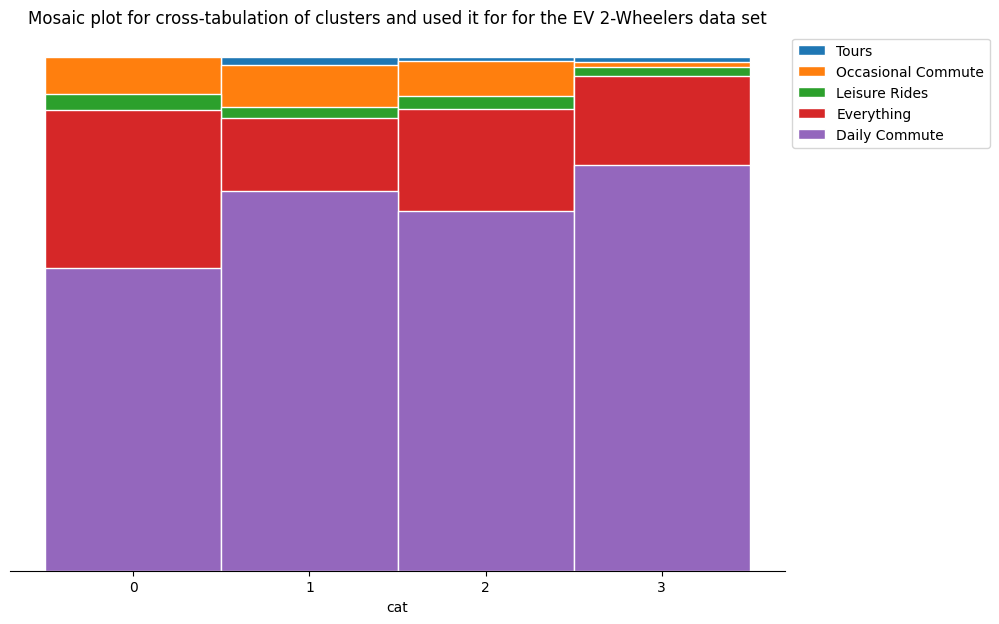

<Figure size 640x480 with 0 Axes>

In [74]:
# Call the mosaicplot function to create a mosaic plot
mosaicplot(used_cluster, color_list[:5], figsize=(10, 7), barwidth=1, title='Mosaic plot for cross-tabulation of clusters and used it for for the EV 2-Wheelers data set')

# Save the figure
plt.savefig("used_it_for_mosaic_plot.png")

# Show the plot
plt.show()

### **Observation:**

The mosaic plot above illustrates that the primary use of electric vehicles across all segments is for daily commuting, with relatively minimal usage reported for tours, occasional commuting, and leisure rides.

In [71]:
# Create a contingency table (cross-tabulation) of 'Owned for' by cluster
owned_cluster = pd.crosstab(index=data_desc['cluster'], columns=data_desc['Owned for'])

# Display the contingency table
owned_cluster

Owned for,3-6 months,6 months-1 yr,< 3 months,> 1 yr,Never owned,Occasional Commute
cluster,,,,,,
0,16,14,31,10,56,0
1,40,55,67,117,50,1
2,41,51,79,56,50,0
3,14,14,43,20,19,0


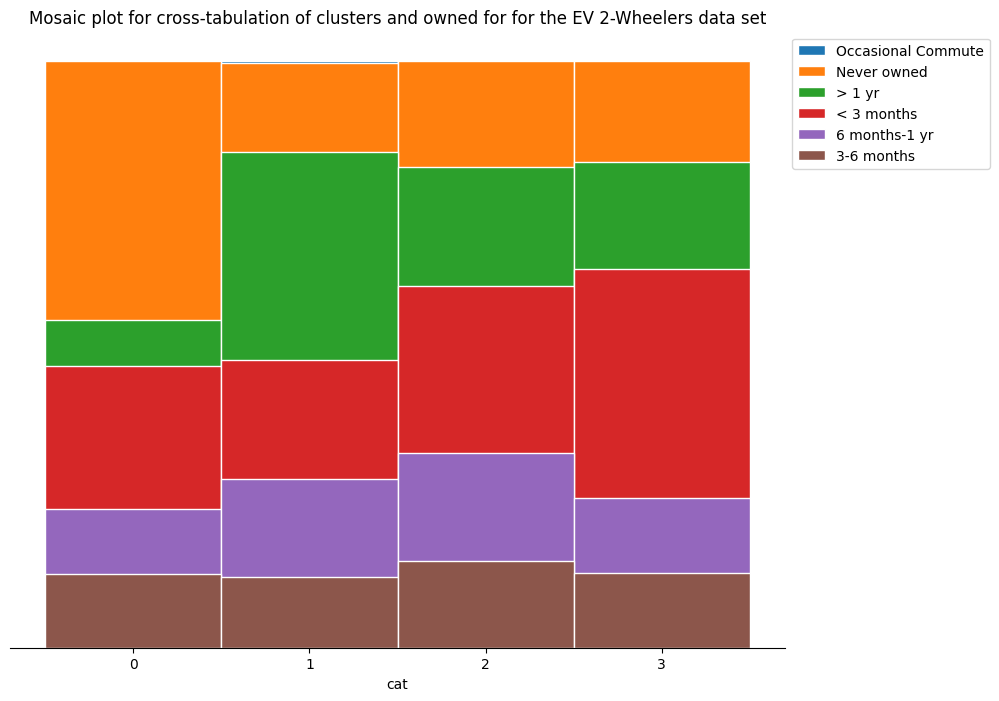

<Figure size 640x480 with 0 Axes>

In [72]:
# Call the mosaicplot function to create a mosaic plot
mosaicplot(owned_cluster, color_list[:6], figsize=(10, 8), barwidth=1, title='Mosaic plot for cross-tabulation of clusters and owned for for the EV 2-Wheelers data set')

# Save the figure
plt.savefig("owned_for_mosaic_plot.png")

# Show the plot
plt.show()

### **Observation:**

The mosaic plot above provides insight into the ownership duration of electric vehicles across different segments. Notably, Segment 1 stands out for owning electric vehicles for more than a year, while Segment 0 has no prior ownership experience. Segment 2 members exhibit moderate ownership durations, ranging from less than 3 months to over a year, while Segment 3 consumers have owned electric vehicles for a shorter duration, spanning from a few days to less than 3 months.




In [75]:
# Create a contingency table (cross-tabulation) of 'Ridden for' by cluster
ridden_cluster = pd.crosstab(index=data_desc['cluster'], columns=data_desc['Ridden for'])

# Display the contingency table
ridden_cluster

Ridden for,10000-15000 kms,5000-10000 kms,< 5000 kms,> 15000 kms,Never owned
cluster,,,,,
0,1,15,54,1,0
1,15,61,184,18,1
2,11,44,158,14,0
3,5,18,63,5,0


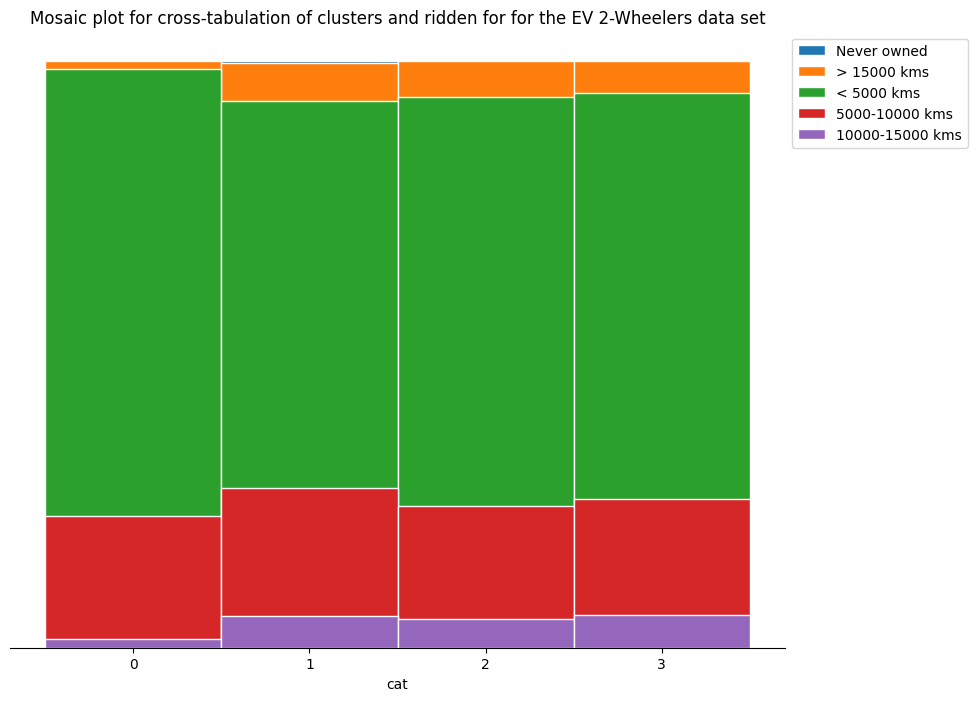

<Figure size 640x480 with 0 Axes>

In [76]:
# Call the mosaicplot function to create a mosaic plot
mosaicplot(ridden_cluster, color_list[:5], figsize=(10, 8), barwidth=1, title='Mosaic plot for cross-tabulation of clusters and ridden for for the EV 2-Wheelers data set')

# Save the figure
plt.savefig("ridden_for_mosaic_plot.png")

# Show the plot
plt.show()

### **Observation:**

The mosaic plot above examines the distances covered by consumers, revealing that the primary use of electric vehicles across all segments is for commuting, with the majority of users covering distances below 5000 kilometers. A small segment of users falls within the 5000 to 10000 kilometers range, which corresponds to their commuting needs.

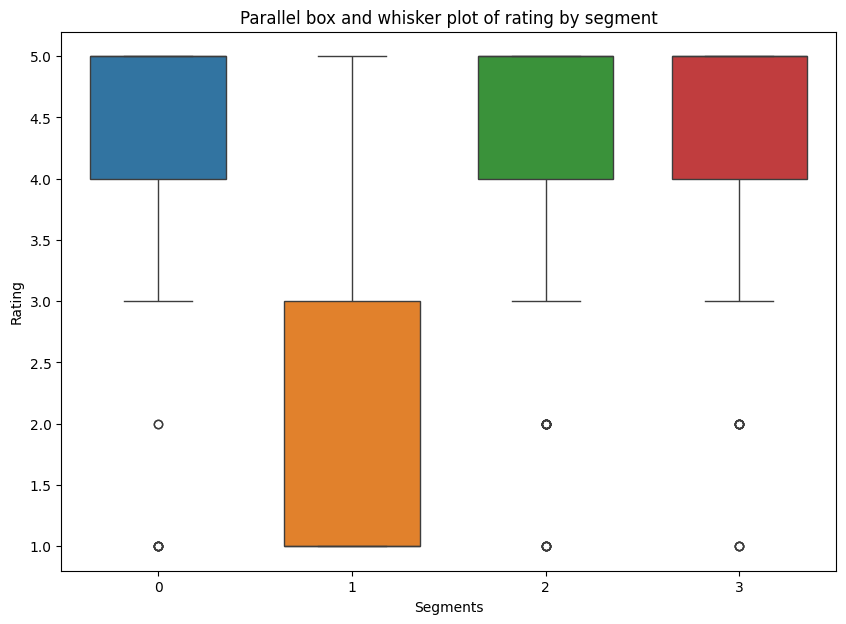

In [78]:
# Create a figure with a specific size
plt.figure(figsize=(10, 7))

# Create a parallel boxplot of 'rating' by 'cluster'
sns.boxplot(data=data_desc, x='cluster', y='rating', palette='tab10', width=0.7)

# Set labels for the x and y axes
plt.xlabel("Segments")
plt.ylabel("Rating")

# Set the title of the plot
plt.title("Parallel box and whisker plot of rating by segment")

# Save the figure as "rating.png"
plt.savefig("rating.png")

# Show the plot
plt.show()

### **Observation:**

The parallel box and whisker plot above highlight substantial variations in average ratings across different segments. Notably, consumers in Segment 1 indicate dissatisfaction across all aspects, resulting in lower overall ratings.

In [79]:
# Display the first few rows of the DataFrame
data_desc.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment,cluster
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative,1
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative,1
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,positive,2
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative,1
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,negative,2


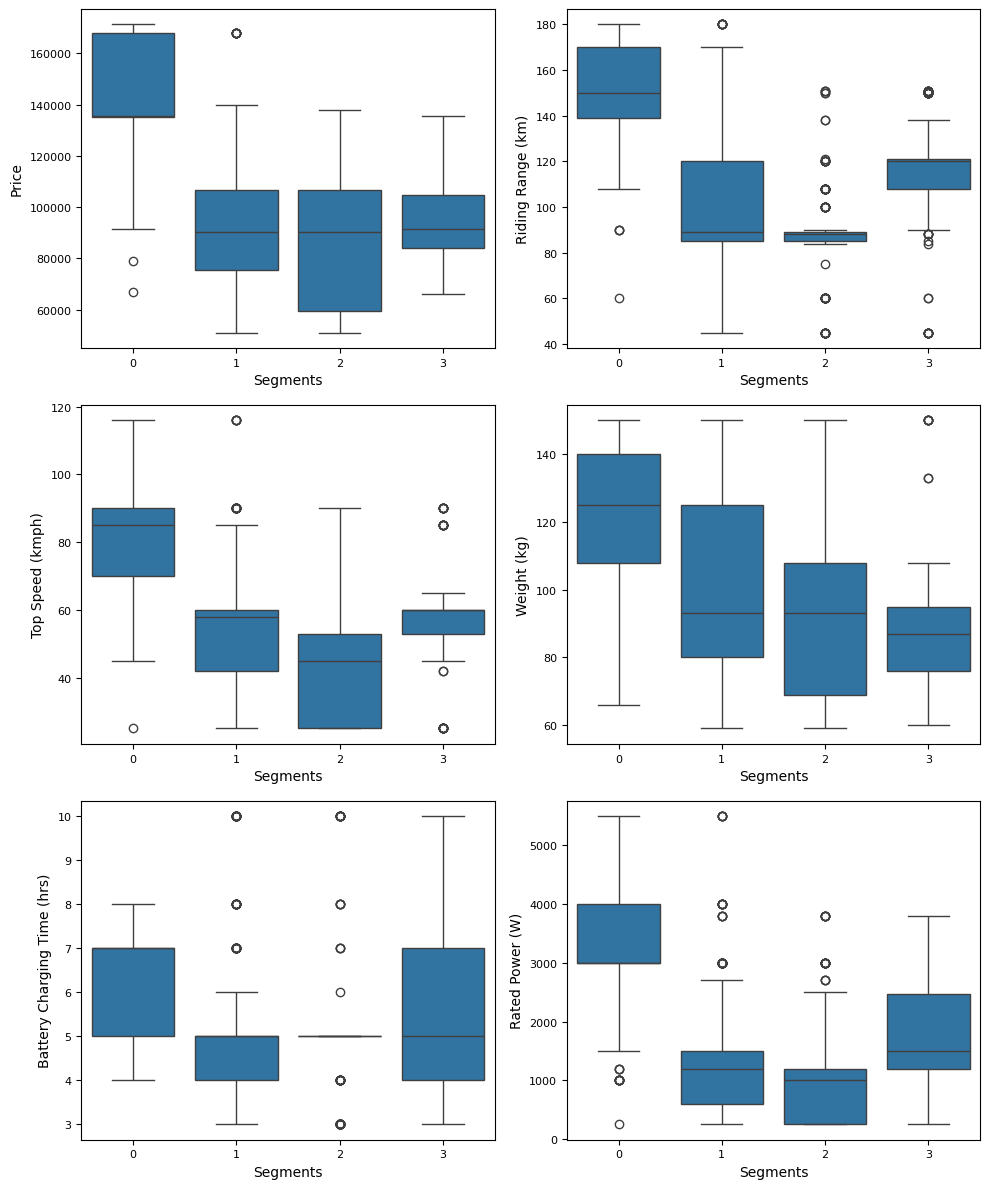

In [80]:
# Create a figure with a specific size
plt.figure(figsize=(10, 12))

# Enumerate over the selected columns
for i, col in enumerate(data_desc.columns[-8:-2]):
    # Create subplots
    plt.subplot(3, 2, i+1)
    
    # Create a boxplot for each cluster
    sns.boxplot(data_desc, x='cluster', y=col)
    
    # Set labels for the x and y axes
    plt.xlabel("Segments", fontsize=10)
    plt.ylabel(col, fontsize=10)
    
    # Set font sizes for x and y ticks
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### **Observation:**

The analysis of technical specifications reveals distinct preferences for electric vehicles across different consumer segments. 

- **Segment 0:** Prefers premium EVs characterized by higher price ranges and extended riding ranges, reflecting a desire for luxury and long-distance travel.

- **Segment 1:** Prioritizes budget-friendly options with lower prices and moderate riding ranges, making them suitable for daily commuting purposes.

- **Segments 2 and 3:** Emphasize affordability, albeit with slight differences in preferences for riding range and speed. Additionally, weight preferences vary among segments, with Segment 0 and Segment 1 favoring heavier vehicles, while Segment 2 and Segment 3 lean towards lighter options.

Regarding charging preferences, there are notable differences as well. Segment 0 and Segment 3 opt for longer charging durations suitable for overnight charging, whereas Segment 1 and Segment 2 prioritize faster charging for quicker turnaround times. 

These nuanced preferences collectively shape the electric vehicle market landscape in India.


## Selection of Target Segment

The strategic target segments for the electric vehicle market are identified as Segment 1 (39% of consumers) and Segment 2 (33% of consumers). Segment 1's diverse preferences and dissatisfaction points present an opportunity for improving customer satisfaction and loyalty by directly addressing their specific demands. Segment 2 values visual appeal, reliability, service experience, and comfort, offering a chance to customize electric vehicles to meet these expectations and emphasize value for money. The strategy involves addressing dissatisfaction points in Segment 1 and enhancing positive elements in Segment 2, aligning electric vehicles with the distinct expectations of each segment to ensure competitive advantage and sustained market growth.

## Customizing the Marketing Mix

In our electric vehicle market strategy, customization of the marketing mix is crucial for appealing to Segment 1 and Segment 2, our target segments.

- **Product Customization**: Enhancing features based on specific desires, addressing dissatisfaction points for Segment 1, and emphasizing visual appeal and value for money for Segment 2. Diverse offerings cater to varied tastes and budgets within each segment.
- **Price Customization**: Competitive pricing for Segment 1 and a slightly higher price point for value-added features in Segment 2.
- **Promotion Customization**: Targeted advertising and tailored promotional events for each segment's preferences.
- **Place Customization**: Accessible distribution channels in urban areas for Segment 1 and suburban/semi-urban regions for Segment 2, with a strong emphasis on online presence and customer support.
- **People and Process Customization**: Training customer service representatives to address segment-specific concerns and ensuring efficient processes for customization requests and service appointments. This tailored approach ensures our electric vehicles align with the distinct needs of Segment 1 and Segment 2, enhancing market relevance and customer preference.

## Potential Early Market Customer Base

In the analysis of the early market customer base, two primary segments are identified: Segment 1 with 330 members (39% of consumers) and Segment 2 with 277 members (33% of consumers). The target price range for Segment 1 falls between ₹51,094 and ₹1,67,844, and for Segment 2, it ranges from ₹51,094 to ₹1,37,890. By multiplying the number of potential customers in each segment by the targeted price range, potential profits can be calculated. For example, with a target price of ₹1,20,000 for Segment 1, the potential profit amounts to ₹39.60 crores, and for Segment 2 with a target price of ₹1,10,000, the potential profit is ₹30.47 crores. Segment 1, being larger in potential market share, is the primary focus for early market penetration efforts due to its significant profit opportunity.

## Most Optimal Market Segments

After thorough analysis and evaluation, Segment 1, constituting 39% of consumers, has been identified as the optimal market segment for electric two-wheeler vehicles. With a significant customer base and a balanced blend of technical specifications and price range, this segment offers substantial market potential. The recommended technical specifications for Segment 1 include a price range of ₹70,688 to ₹1,29,063, riding range of 89 to 180 km, top speed of 58 to 116 kmph, weight of 76 to 120 kg, battery charging time of 3 to 5 hours, and rated power of 1200 to 5500 W. This targeted approach ensures alignment with the diverse needs and preferences of the market, laying the foundation for a successful and sustainable venture into the electric vehicle market.

## Conclusion

In summary, our in-depth analysis of India's electric vehicle market led us to identify Segment 1 as the optimal target. With a significant 39% consumer base, this segment represents a substantial market opportunity. By tailoring our electric two-wheeler specifications to meet the preferences of this segment, we ensure our products align seamlessly with the demands of a large customer base. This strategic decision is grounded in a thorough understanding of market segmentation, consumer behavior, and technical specifications. These insights provide a clear direction for our market entry, emphasizing precision and relevance in both product development and marketing strategies. Moving forward, this approach equips us with a solid foundation, ensuring our offerings resonate effectively within India's evolving electric vehicle landscape.
